1/1 [==============================] - 0s 57ms/step


Text(0.5, 1.0, 'Velocity field - SIMULATION')

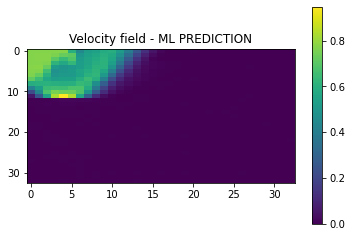

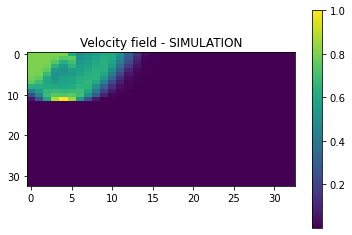

In [3]:
# load model and scaler and make predictions on new data
!pip install tensorflow_addons
import tensorflow_addons as tfa
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pickle import load
from keras.models import load_model
MODEL_PATH = 'ann_velo_v3.h5'
# Load your trained model
model = load_model(MODEL_PATH)
data_path = 'input.npy'
#def predict(data_path):
import numpy as np
data_f = np.load(data_path)
scaler = load(open('scale_v3.pkl', 'rb'))
data_f = scaler.transform(data_f.reshape(1,-1))
#data_f = data_f.reshape(1,-1)
# Be careful how your trained model deals with the input
# otherwise, it won't make correct prediction!
preds = model.predict(data_f)
preds = np.reshape(preds,(33,33))
import matplotlib.pyplot as plt
a = preds
b = np.load('actual.npy')
fig1, ax1 = plt.subplots()
im1 = ax1.imshow(a, interpolation='nearest', aspect=0.5)
fig1.colorbar(im1)
plt.title("Velocity field - ML PREDICTION")
fig2, ax2 = plt.subplots()
im2 = ax2.imshow(b, interpolation='nearest',aspect = 0.5)
fig2.colorbar(im2)
plt.title("Velocity field - SIMULATION")